In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_json("a2_ex4_fine1_search.json")

In [25]:
df = df.drop("scores", axis="columns")
df['log_lambda'] = np.log10(df['lambda_'])

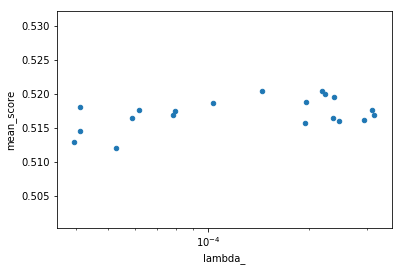

In [26]:
df.plot(x="lambda_", y="mean_score", kind="scatter", logx=True)

In [27]:
df = df.sort_values(by=['lambda_'])

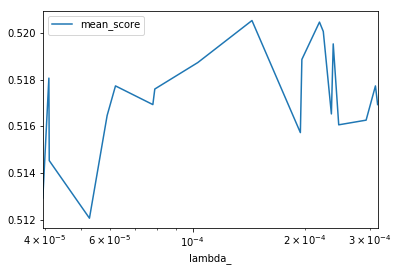

In [28]:
df.plot(x="lambda_", y="mean_score", kind="line", logx=True)

In [29]:
df.loc[df['mean_score'].idxmax()]

lambda_       0.000144
mean_score    0.520533
log_lambda   -3.840433
Name: 4, dtype: float64

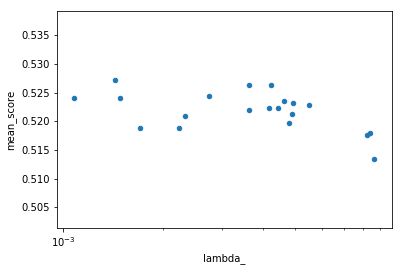

In [30]:
df = pd.read_json("a2_ex4_fine2_search.json")
df = df.drop("scores", axis="columns")
df.plot(x="lambda_", y="mean_score", kind="scatter", logx=True)

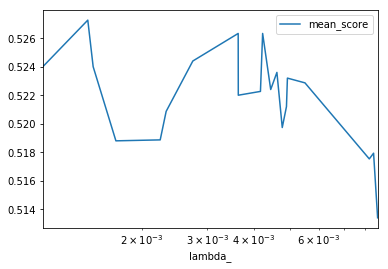

In [31]:
df = df.sort_values(by=['lambda_'])
df.plot(x="lambda_", y="mean_score", kind="line", logx=True)

In [32]:
df['log_lambda'] = np.log10(df['lambda_'])
df.loc[df['mean_score'].idxmax()]

lambda_       0.001430
mean_score    0.527267
log_lambda   -2.844722
Name: 11, dtype: float64